In [1]:
import numpy as np
from matplotlib import pyplot as plt

Ряд Фурье

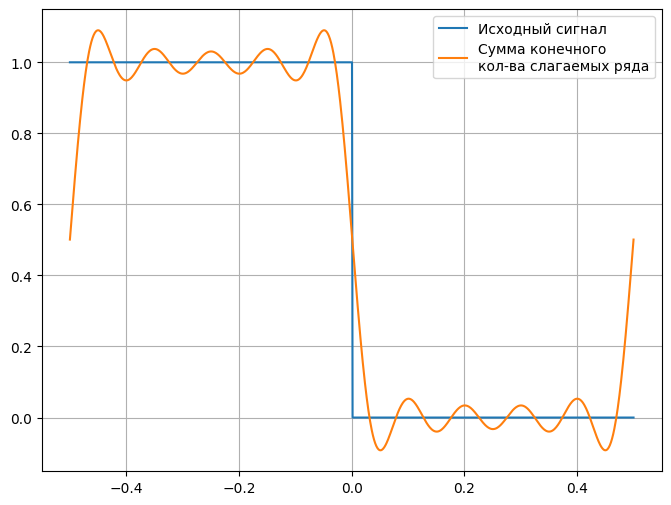

In [2]:
T = 1.0
w_1 = 2*np.pi/T
t = np.linspace(-T/2, T/2, 1000)
dt = t[1]-t[0]

sig = np.zeros_like(t)
# --------- square
sig[:501] = 1
sig[501:] = 0
# ---------  saw
# sig = t.copy()
# --------- sine
# sig = np.sin(1*w_1*t)

# Чтобы несколько периодов отобразить
# sig = np.hstack((sig, sig))
# t = np.linspace(-T/2, 3*T/2, 2000)
# T *= 2


num_terms = 10
sig_t = 0
c_n_spec = []
for n in range(-num_terms, num_terms+1):
    c_n = 1/T * np.trapezoid(sig * np.exp(1j*n*w_1*t), dx=dt)   
    sig_t += c_n * np.exp(-1j*n*w_1*t)

    c_n_spec.append(c_n)


plt.figure(figsize=(8, 6))
plt.plot(t, sig)
plt.plot(t, np.real(sig_t))
plt.grid()
plt.legend(['Исходный сигнал', 'Сумма конечного \nкол-ва слагаемых ряда',], loc='upper right')

АЧС, ФЧС

Text(0.5, 1.0, 'Периодический сигнал: ФЧС')

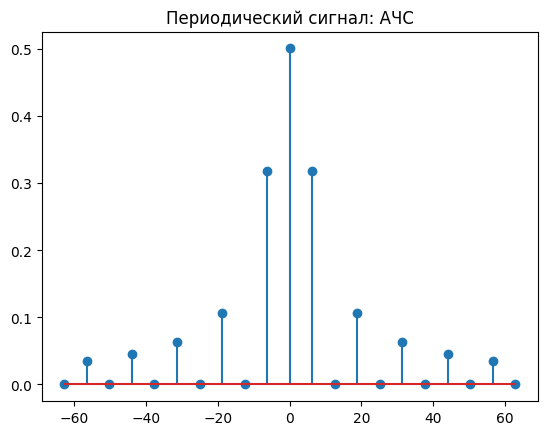

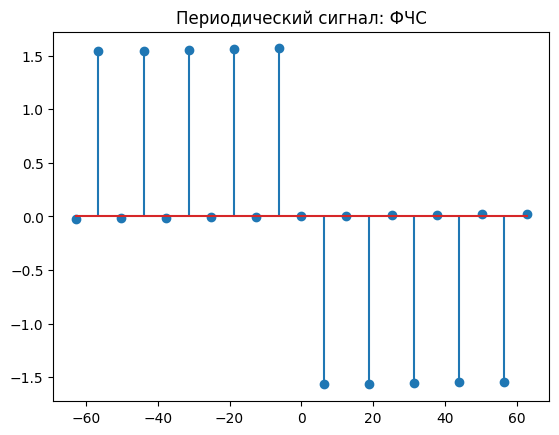

In [3]:
# Ось частоты
w_n = np.array(range(-num_terms, num_terms+1))*w_1

# АЧС
plt.stem(w_n, np.abs(c_n_spec))
plt.title("Периодический сигнал: АЧС")
plt.figure()
# ФЧС
plt.stem(w_n, np.arctan2(np.imag(c_n_spec), np.real(c_n_spec)))
plt.title("Периодический сигнал: ФЧС")

Преобразование Фурье

Text(0.5, 1.0, 'Амплитудно-частотный спектр $|S(\\omega)|$')

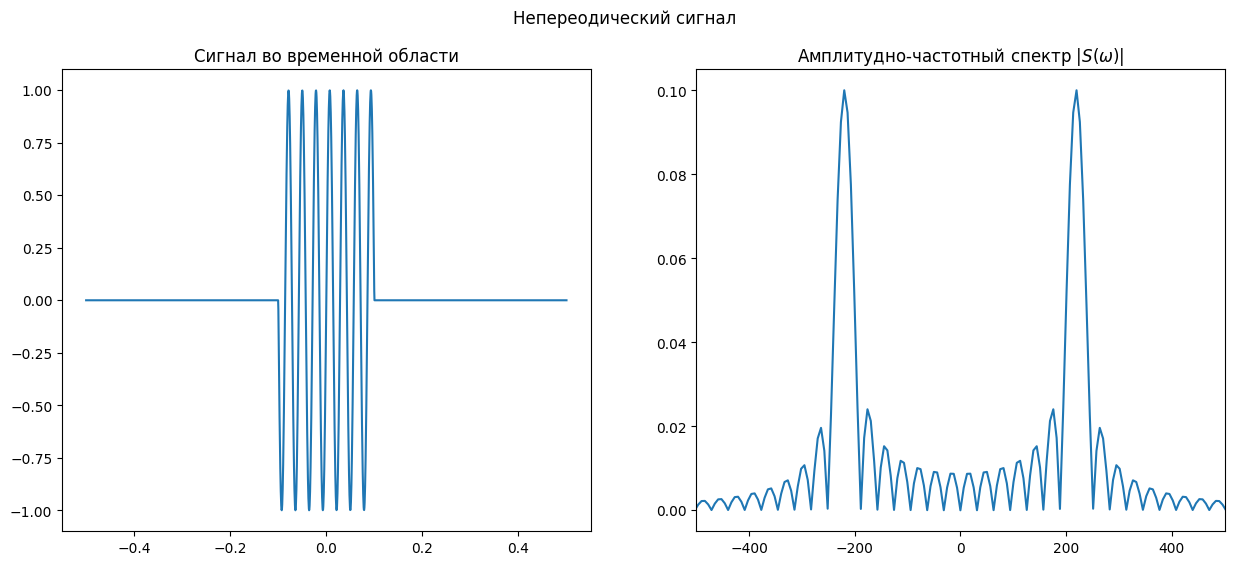

In [4]:
T = 1.0
t = np.linspace(-T/2, T/2, 2000)
dt = t[1]-t[0]
fs = 1/dt

# Частота
omega = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(t)))*fs

sig = np.zeros_like(t)
# --------- square
# sig[:100] = 1
# sig[1000:2000] = 1
# --------- sine
sig[800:1200] = np.sin(2*np.pi*35*t[800:1200])


# Спектральная плотность сигнала
sig_spec = np.trapezoid(sig * np.exp(-1j*omega[:, None] @ t[None, :]), dx=dt, axis=1)

fig, ax = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Непереодический сигнал")
# Сигнал во временной области
ax[0].plot(t, sig)
ax[0].set_title("Сигнал во временной области")
# АЧС
ax[1].plot(omega, abs(sig_spec))
ax[1].set_xlim([-500, 500])
ax[1].set_title("Амплитудно-частотный спектр $|S(\omega)|$")

Импульсная характеристика и передаточная функция

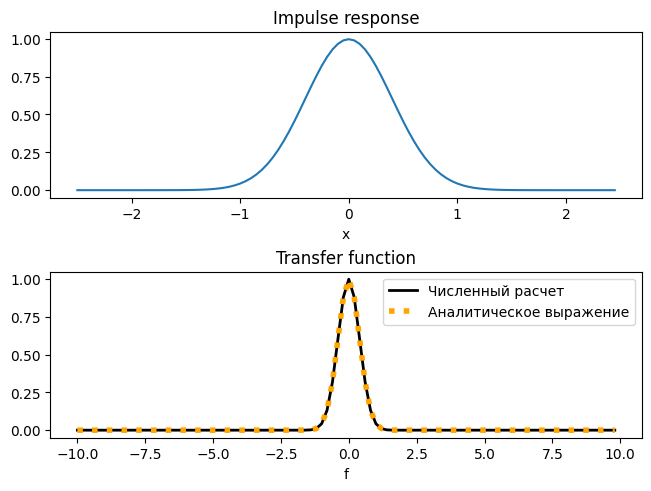

In [5]:
# Пусть импульсная характеристика имеет форму гауссовской функции
sigma = 0.4
x_fin = 5.0
dt = x_fin / 100
fs = 1 / dt
x = np.arange(-x_fin/2, x_fin/2, dt)
# длина массива частота
fftl = len(x)
# массив частот
f = np.fft.fftshift(np.fft.fftfreq(fftl)) * fs
# Циклическая частота
omega = 2*np.pi*f

# Выражение для импульсной характеристики
h_imp = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-x**2 / (2 * sigma**2))
# Преобразование фурье
k_transfer = np.trapezoid(h_imp * np.exp(-1j*omega[:, None] @ x[None, :]), dx=dt, axis=1)

# Аналитическое выражение для функции передачи
k_transfer_analit = np.exp(-omega**2 * sigma**2 / 2)


fig, ax = plt.subplots(2, 1, layout="constrained")
ax[0].plot(x, h_imp)
ax[0].set_title("Impulse response")
ax[0].set_xlabel('x')

ax[1].plot(f, abs(k_transfer), c='k', lw=2)
ax[1].plot(f, k_transfer_analit, c='orange', ls='dotted', lw=4)
ax[1].set_title("Transfer function")
ax[1].set_xlabel('f')
ax[1].legend(['Численный расчет', 'Аналитическое выражение'])

В примере выше мы построили импульсную функцию от некоторой переменной x, которая может принимать отрицательные и положительные значения. Если решается конкретная задача во временной области, то необходимо помнить о принципе физической реализуемости: выходной сигнал не может возникнуть раньше входного, т.е. $h(t) = 0$ при $t<0$

Text(0, 0.5, '$h(t)$')

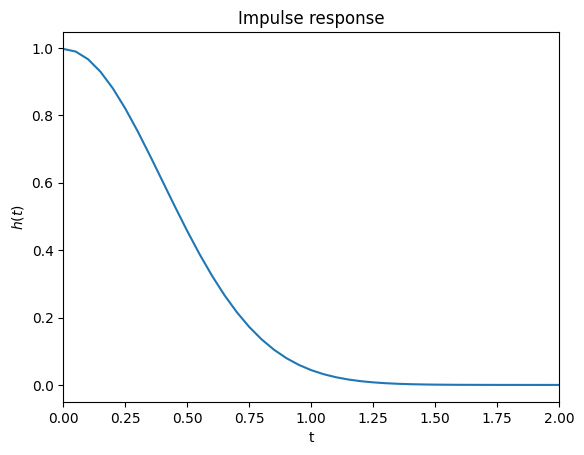

In [6]:
t = np.arange(0, x_fin, dt)
# Выражение для импульсной характеристики
h_imp = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-t**2 / (2 * sigma**2))

plt.plot(t, h_imp)
plt.xlim([0, 2])
plt.title("Impulse response")
plt.xlabel('t')
plt.ylabel('$h(t)$')
